In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras import layers, optimizers
from keras.src.datasets import mnist

from keras.api.layers import (
    Dense,
    LeakyReLU,
    Reshape,
    Conv2D,
    Conv2DTranspose,
    BatchNormalization,
    LeakyReLU,
    Flatten,
)

In [ ]:
# Define Generator model
def build_generator(img_shape, z_dim):
    model = keras.Sequential(
        [
            layers.Dense(256 * 7 * 7, input_dim=z_dim),
            layers.LeakyReLU(0.01),
            layers.Reshape((7, 7, 256)),
            layers.Conv2DTranspose(
                128, kernel_size=5, strides=1, padding="same"),
            layers.BatchNormalization(),
            layers.LeakyReLU(0.01),
            layers.Conv2DTranspose(
                64, kernel_size=5, strides=2, padding="same"),
            layers.BatchNormalization(),
            layers.LeakyReLU(0.01),
            layers.Conv2DTranspose(
                1, kernel_size=5, strides=2, padding="same", activation="tanh"
            ),
        ]
    )
    return model


# Define Discriminator model
def build_discriminator(img_shape):
    model = keras.Sequential(
        [
            layers.Conv2D(
                32, kernel_size=3, strides=2, padding="same", input_shape=img_shape
            ),
            layers.LeakyReLU(0.01),
            layers.Conv2D(64, kernel_size=3, strides=2, padding="same"),
            layers.BatchNormalization(),
            layers.LeakyReLU(0.01),
            layers.Conv2D(128, kernel_size=3, strides=2, padding="same"),
            layers.BatchNormalization(),
            layers.LeakyReLU(0.01),
            layers.Flatten(),
            layers.Dense(1, activation="sigmoid"),
        ]
    )
    return model

In [ ]:
# Display generated images
def display_images(epoch, generator, z_dim, num_images=25):
    noise = np.random.randn(num_images, z_dim)
    generated_images = generator.predict(noise)
    generated_images = 0.5 * generated_images + \
        0.5  # Rescale from [-1, 1] to [0, 1]

    fig, axes = plt.subplots(5, 5, figsize=(10, 10))
    for i, ax in enumerate(axes.flatten()):
        ax.imshow(generated_images[i, :, :, 0], cmap="gray")
        ax.axis("off")
    plt.suptitle(f"Epoch {epoch+1}", fontsize=16)
    plt.show()

In [ ]:
# Load and preprocess the dataset
(x_train, _), (_, _) = mnist.load_data()
x_train = x_train.astype("float32") / 127.5 - 1
x_train = np.expand_dims(x_train, axis=-1)

# Define model parameters
img_shape = x_train[0].shape
z_dim = 100

# Build and compile the discriminator
discriminator = build_discriminator(img_shape)
discriminator.compile(
    loss="binary_crossentropy",
    optimizer=optimizers.Adam(),
    metrics=["accuracy"],
)

# Build the generator
generator = build_generator(img_shape, z_dim)

# Combined model for training the generator
z = keras.Input(shape=(z_dim,))
img = generator(z)
discriminator.trainable = False
validity = discriminator(img)
combined = keras.Model(z, validity)
combined.compile(loss="binary_crossentropy", optimizer=optimizers.Adam())

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Epoch [1/1000] | D Loss: 0.7090 | G Loss: 0.7037
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Epoch [2/1000] | D Loss: 0.7059 | G Loss: 0.7044
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Epoch [3/1000] | D Loss: 0.7055 | G Loss: 0.7051
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Epoch [4/1000] | D Loss: 0.7065 | G Loss: 0.7066
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Epoch [5/1000] | D Loss: 0.7075 | G Loss: 0.7078
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Epoch [6/1000] | D Loss: 0.7084 | G Loss: 0.7089
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Epoch [7/1000] | D Loss: 0.7095 | G Loss: 0.7100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Epoch [8/1000] | D Loss: 0.7107 | G Loss: 0.7113
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Epoch [9/1000] | D Loss: 0.7120 | G Loss: 0.7126
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Epoch [10/1000] | D Loss: 0.7130 | G Loss: 0.7136
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


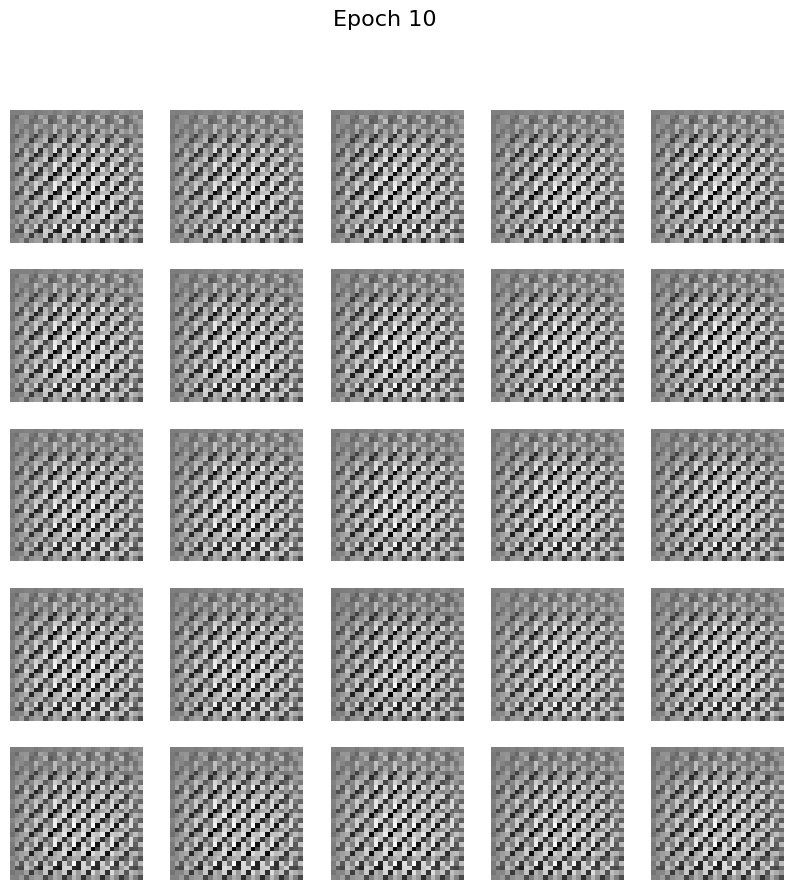

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Epoch [11/1000] | D Loss: 0.7141 | G Loss: 0.7147
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Epoch [12/1000] | D Loss: 0.7152 | G Loss: 0.7158
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Epoch [13/1000] | D Loss: 0.7164 | G Loss: 0.7170
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Epoch [14/1000] | D Loss: 0.7176 | G Loss: 0.7182
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Epoch [15/1000] | D Loss: 0.7186 | G Loss: 0.7193
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Epoch [16/1000] | D Loss: 0.7197 | G Loss: 0.7204
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Epoch [17/1000] | D Loss: 0.7209 | G Loss: 0.7216
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Epoch [18/1000] | D Loss: 0.7220 | G Loss: 0.7227
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Epoch [19/1000] | D Loss: 0.7232 | G Loss: 0.7239
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Epoch [20/1000] | D Loss: 0.7245 | G Loss: 0.7253
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


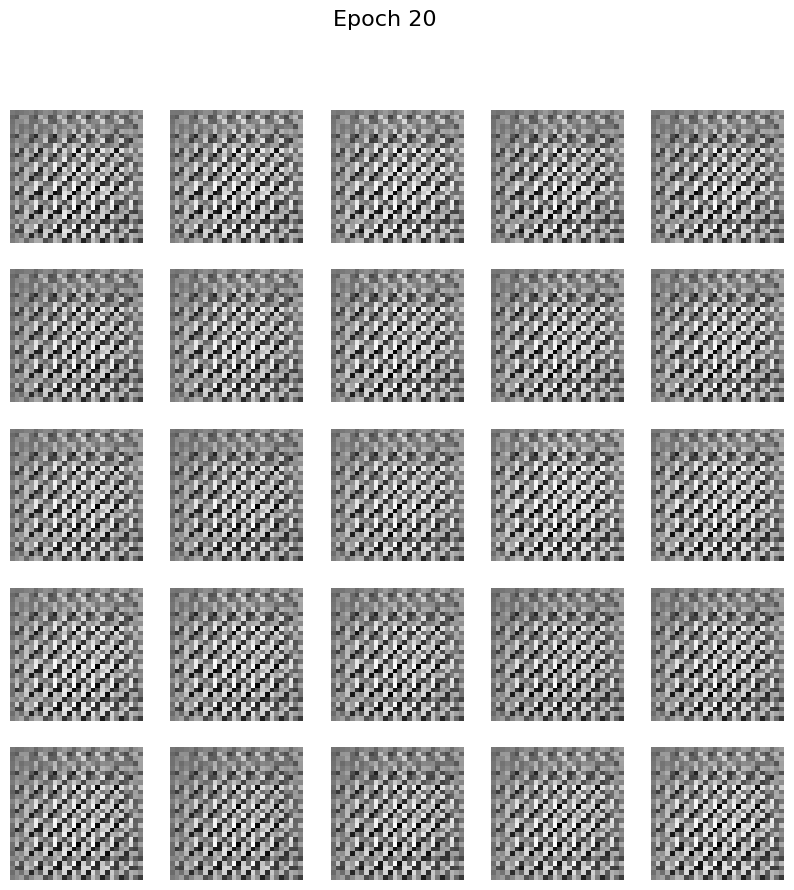

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Epoch [21/1000] | D Loss: 0.7258 | G Loss: 0.7266
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Epoch [22/1000] | D Loss: 0.7270 | G Loss: 0.7278
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Epoch [23/1000] | D Loss: 0.7282 | G Loss: 0.7290
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Epoch [24/1000] | D Loss: 0.7295 | G Loss: 0.7303
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Epoch [25/1000] | D Loss: 0.7308 | G Loss: 0.7317
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Epoch [26/1000] | D Loss: 0.7321 | G Loss: 0.7330
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Epoch [27/1000] | D Loss: 0.7335 | G Loss: 0.7344
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Epoch [28/1000] | D Loss: 0.7349 | G Loss: 0.7358
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Epoch [29/1000] | D Loss: 0.7363 | G Loss: 0.7373
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Epoch [30/1000] | D Loss: 0.7377 | G Loss: 0.7387
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


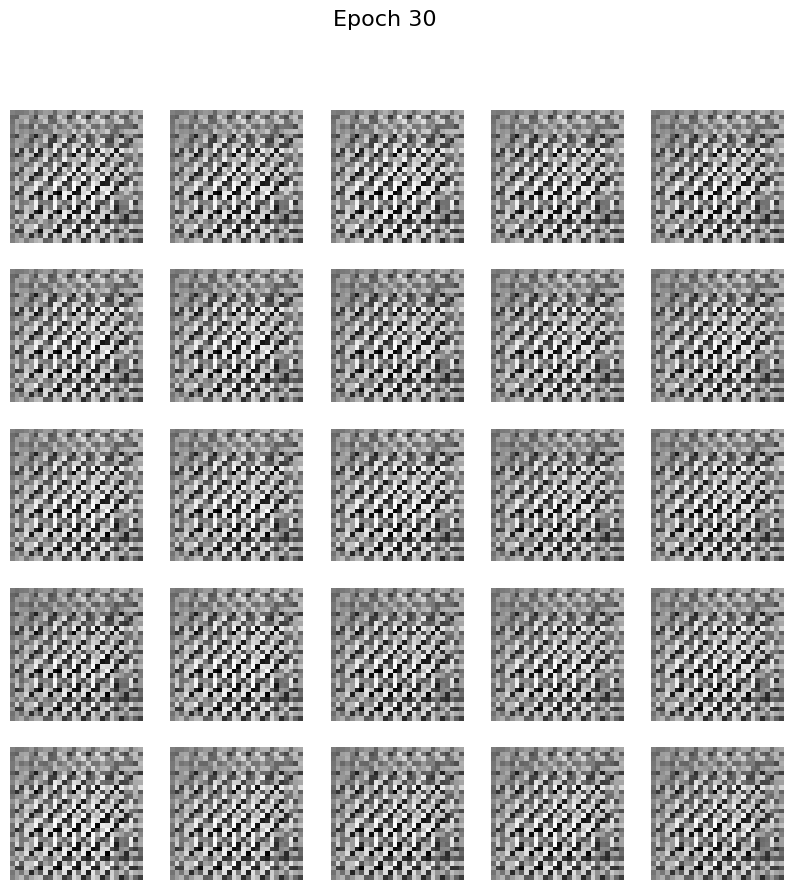

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Epoch [31/1000] | D Loss: 0.7391 | G Loss: 0.7401
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Epoch [32/1000] | D Loss: 0.7407 | G Loss: 0.7416
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Epoch [33/1000] | D Loss: 0.7421 | G Loss: 0.7431
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Epoch [34/1000] | D Loss: 0.7436 | G Loss: 0.7446
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Epoch [35/1000] | D Loss: 0.7451 | G Loss: 0.7461
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Epoch [36/1000] | D Loss: 0.7465 | G Loss: 0.7475
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Epoch [37/1000] | D Loss: 0.7480 | G Loss: 0.7490
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Epoch [38/1000] | D Loss: 0.7495 | G Loss: 0.7505
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Epoch [39/1000] | D Loss: 0.7510 | G Loss: 0.7520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Epoch [40/1000] | D Loss: 0.7524 | G Loss: 0.7534
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


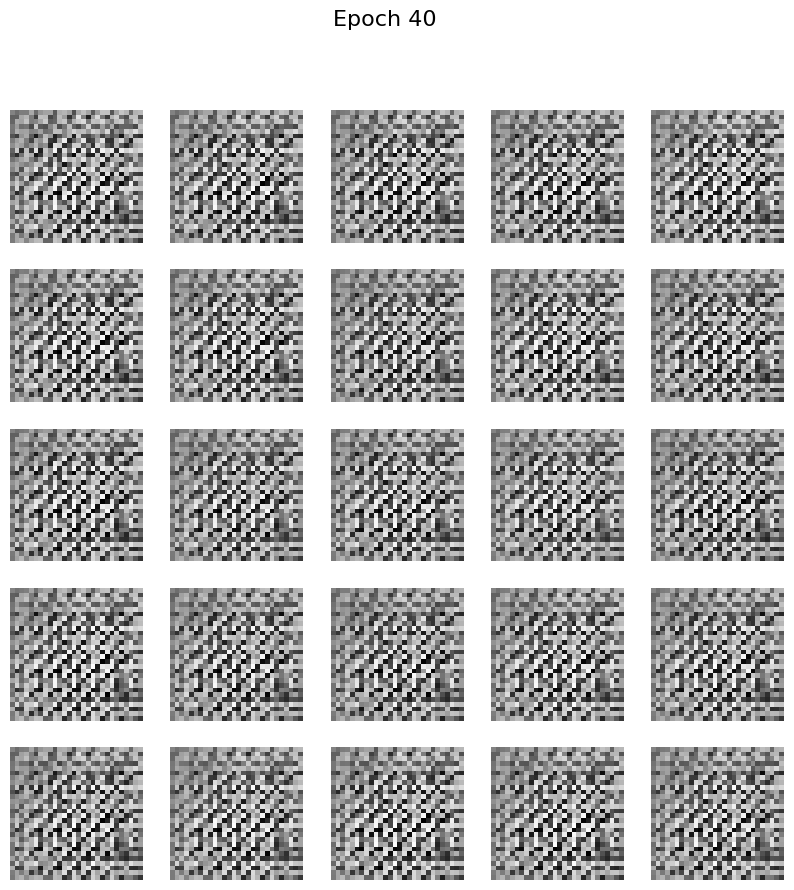

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Epoch [41/1000] | D Loss: 0.7539 | G Loss: 0.7548
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Epoch [42/1000] | D Loss: 0.7553 | G Loss: 0.7563
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Epoch [43/1000] | D Loss: 0.7567 | G Loss: 0.7577
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Epoch [44/1000] | D Loss: 0.7581 | G Loss: 0.7591
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Epoch [45/1000] | D Loss: 0.7595 | G Loss: 0.7605
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Epoch [46/1000] | D Loss: 0.7610 | G Loss: 0.7620
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Epoch [47/1000] | D Loss: 0.7624 | G Loss: 0.7633
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Epoch [48/1000] | D Loss: 0.7637 | G Loss: 0.7647
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Epoch [49/1000] | D Loss: 0.7650 | G Loss: 0.7660
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Epoch [50/1000] | D Loss: 0.7664 | G Loss: 0.7673
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


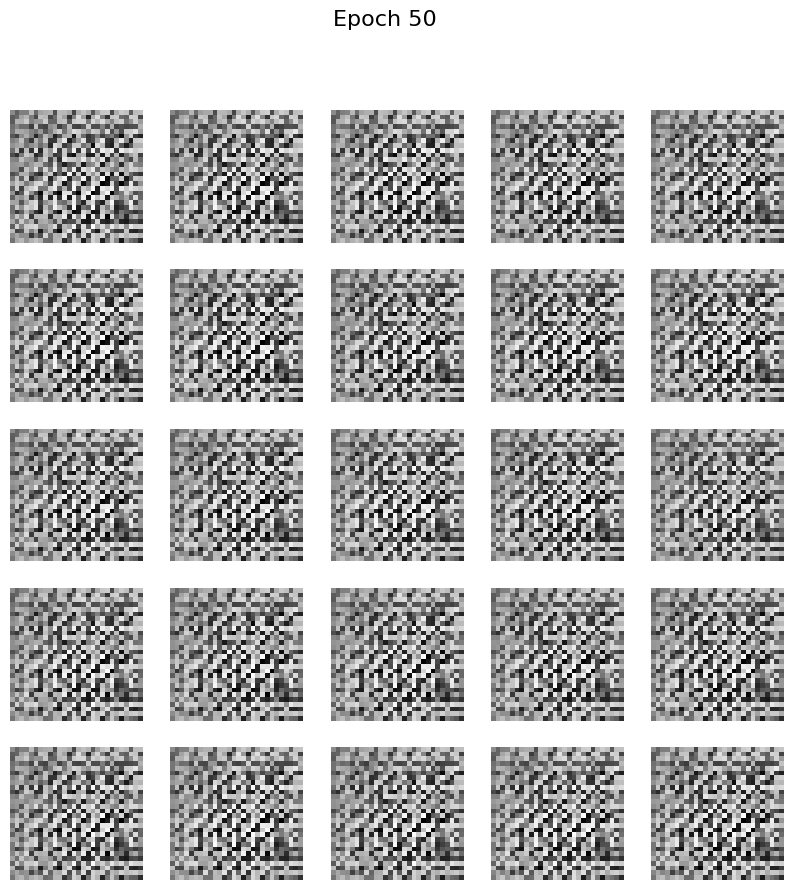

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Epoch [51/1000] | D Loss: 0.7677 | G Loss: 0.7687
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Epoch [52/1000] | D Loss: 0.7691 | G Loss: 0.7700
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Epoch [53/1000] | D Loss: 0.7704 | G Loss: 0.7713
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Epoch [54/1000] | D Loss: 0.7717 | G Loss: 0.7726
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Epoch [55/1000] | D Loss: 0.7730 | G Loss: 0.7739
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Epoch [56/1000] | D Loss: 0.7743 | G Loss: 0.7752
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Epoch [57/1000] | D Loss: 0.7756 | G Loss: 0.7765
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Epoch [58/1000] | D Loss: 0.7768 | G Loss: 0.7777
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Epoch [59/1000] | D Loss: 0.7780 | G Loss: 0.7789
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Epoch [60/1000] | D Loss: 0.7793 | G Loss: 0.7802
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


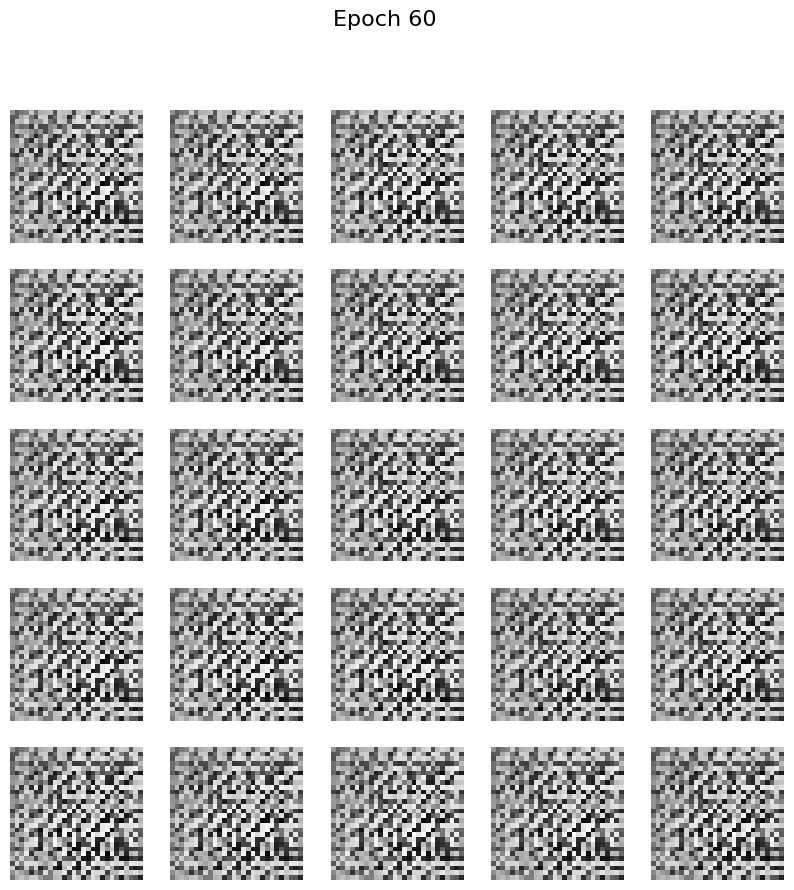

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Epoch [61/1000] | D Loss: 0.7805 | G Loss: 0.7814
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Epoch [62/1000] | D Loss: 0.7817 | G Loss: 0.7826
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Epoch [63/1000] | D Loss: 0.7830 | G Loss: 0.7838
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


In [2]:
# Training parameters
batch_size = 32
num_epochs = 1000

# Training loop
for epoch in range(num_epochs):
    idx = np.random.randint(0, x_train.shape[0], batch_size)
    real_images = x_train[idx]

    # Generate fake images
    noise = np.random.randn(batch_size, z_dim)
    fake_images = generator.predict(noise)

    # Train the discriminator
    d_loss_real = discriminator.train_on_batch(
        real_images, np.ones((batch_size, 1)))
    d_loss_fake = discriminator.train_on_batch(
        fake_images, np.zeros((batch_size, 1)))
    d_loss, accuracy = 0.5 * np.add(d_loss_real, d_loss_fake)

    # Train the generator
    noise = np.random.randn(batch_size, z_dim)
    g_loss = combined.train_on_batch(noise, np.ones((batch_size, 1)))

    # Display the progress
    print(
        f"Epoch [{epoch+1}/{num_epochs}] | D Loss: {d_loss:.4f} | G Loss: {g_loss[0]:.4f}"
    )

    # Display generated images
    if (epoch + 1) % 10 == 0:
        display_images(epoch, generator, z_dim)